вариант 2

## 38
Необходимо отсортировать массив объектов по заданному критерию и вывести результат на экран. В зависимости от переданного параметра отсортировать массив объектов класса «Книга» по автору, названию или году издания, используя алгоритмы сортировки: пузырьковую, сортировку вставками и быструю сортировку. Сравнить время выполнения алгоритмов сортировки с помощью декоратора. Данные о книгах хранятся в файле.

In [2]:
class Book(object):
    # класс Книига: автор, название, год издания
    def __init__(self, author, b_name, year):
        self.author = author
        self.name = b_name
        self.year = year
    
    def __repr__(self):
        return f"Книга(автор={self.author}, название={self.name}, год издания={self.year})"

In [3]:
def bubble_sort(books, key):
    # сортировка пузырьком
    n = len(books)
    for i in range(n):
        for j in range(0, n - i - 1):
            if key(books[j]) > key(books[j + 1]):
                books[j], books[j + 1] = books[j + 1], books[j]


def insertion_sort(books, key):
    # сортировка вставками
    n = len(books)
    for i in range(1, n):
        key_book = books[i]
        j = i - 1
        while j >= 0 and key(books[j]) > key(key_book):
            books[j + 1] = books[j]
            j -= 1
        books[j + 1] = key_book

        
def quick_sort(books, key, low, high):
    # быстрая сортировка 
    if low < high:
        partition_index = partition(books, key, low, high)

        quick_sort(books, key, low, partition_index - 1)
        quick_sort(books, key, partition_index + 1, high)

        
def partition(books, key, low, high):
    # часть быстрой сортировки
    pivot = books[high]
    i = low - 1
    for j in range(low, high):
        if key(books[j]) <= key(pivot):
            i += 1
            books[i], books[j] = books[j], books[i]
    books[i + 1], books[high] = books[high], books[i + 1]
    return i + 1


In [4]:
import time


def measure_time(func):
    # декоратор для измерения времени
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        res = end - start
        print(f"выполнена за {res:.20f} секунд")
        return result
    return wrapper


In [5]:
@measure_time
def sort_books(books, key, algorithm):
    if algorithm == "bubble_sort":
        bubble_sort(books, key)
    elif algorithm == "insertion_sort":
        insertion_sort(books, key)
    elif algorithm == "quick_sort":
        quick_sort(books, key, 0, len(books) - 1)
    else:
        raise ValueError("Некорректный алгоритм сортировки")

In [35]:
books = [
    Book("Лев Толстой", "Война и мир", 1869),
    Book("Джордж Оруэлл", "1984", 1949),
    Book("Дж. Р. Р. Толкин", "Повелитель колец", 1954),
    Book("Антуан де Сент-Экзюпери", "Маленький принц", 1943),
    Book("Харпер Ли", "Убить пересмешника", 1960),
    Book("Габриэль Гарсиа Маркес", "Сто лет одиночества", 1967),
    Book("Джером Д. Сэлинджер", "Над пропастью во ржи", 1951),
    Book("Рэй Брэдбери", "451 градус по Фаренгейту", 1953),
    Book("Олдос Хаксли", "Дивный новый мир", 1932),
    Book("Джон Стейнбек", "О мышах и людях", 1937),
    Book("Лев Толстой", "Война и мир", 1869),
    Book("Джордж Оруэлл", "1984", 1949),
    Book("Дж. Р. Р. Толкин", "Повелитель колец", 1954),
    Book("Антуан де Сент-Экзюпери", "Маленький принц", 1943),
    Book("Харпер Ли", "Убить пересмешника", 1960),
    Book("Габриэль Гарсиа Маркес", "Сто лет одиночества", 1967),
    Book("Джером Д. Сэлинджер", "Над пропастью во ржи", 1951),
]

books1 = books[:]
books2 = books[:]

books3 = books[:]
books4 = books[:]
books5 = books[:]

books6 = books[:]
books7 = books[:]
books8 = books[:]

In [36]:
sort_books(books, lambda book: book.author, "bubble_sort")
print(*books, sep='\n')

выполнена за 0.00000000000000000000 секунд
Книга(автор=Антуан де Сент-Экзюпери, название=Маленький принц, год издания=1943)
Книга(автор=Антуан де Сент-Экзюпери, название=Маленький принц, год издания=1943)
Книга(автор=Габриэль Гарсиа Маркес, название=Сто лет одиночества, год издания=1967)
Книга(автор=Габриэль Гарсиа Маркес, название=Сто лет одиночества, год издания=1967)
Книга(автор=Дж. Р. Р. Толкин, название=Повелитель колец, год издания=1954)
Книга(автор=Дж. Р. Р. Толкин, название=Повелитель колец, год издания=1954)
Книга(автор=Джером Д. Сэлинджер, название=Над пропастью во ржи, год издания=1951)
Книга(автор=Джером Д. Сэлинджер, название=Над пропастью во ржи, год издания=1951)
Книга(автор=Джон Стейнбек, название=О мышах и людях, год издания=1937)
Книга(автор=Джордж Оруэлл, название=1984, год издания=1949)
Книга(автор=Джордж Оруэлл, название=1984, год издания=1949)
Книга(автор=Лев Толстой, название=Война и мир, год издания=1869)
Книга(автор=Лев Толстой, название=Война и мир, год издани

In [37]:
sort_books(books1, lambda book: book.author, "insertion_sort")

выполнена за 0.00000000000000000000 секунд


In [38]:
sort_books(books2, lambda book: book.author, "quick_sort")

выполнена за 0.00000000000000000000 секунд


In [39]:
sort_books(books3, lambda book: book.name, "bubble_sort")

выполнена за 0.00000000000000000000 секунд


In [40]:
sort_books(books4, lambda book: book.name, "insertion_sort")
print(*books, sep='\n')

выполнена за 0.00000000000000000000 секунд
Книга(автор=Антуан де Сент-Экзюпери, название=Маленький принц, год издания=1943)
Книга(автор=Антуан де Сент-Экзюпери, название=Маленький принц, год издания=1943)
Книга(автор=Габриэль Гарсиа Маркес, название=Сто лет одиночества, год издания=1967)
Книга(автор=Габриэль Гарсиа Маркес, название=Сто лет одиночества, год издания=1967)
Книга(автор=Дж. Р. Р. Толкин, название=Повелитель колец, год издания=1954)
Книга(автор=Дж. Р. Р. Толкин, название=Повелитель колец, год издания=1954)
Книга(автор=Джером Д. Сэлинджер, название=Над пропастью во ржи, год издания=1951)
Книга(автор=Джером Д. Сэлинджер, название=Над пропастью во ржи, год издания=1951)
Книга(автор=Джон Стейнбек, название=О мышах и людях, год издания=1937)
Книга(автор=Джордж Оруэлл, название=1984, год издания=1949)
Книга(автор=Джордж Оруэлл, название=1984, год издания=1949)
Книга(автор=Лев Толстой, название=Война и мир, год издания=1869)
Книга(автор=Лев Толстой, название=Война и мир, год издани

In [41]:
sort_books(books5, lambda book: book.name, "quick_sort")

выполнена за 0.00000000000000000000 секунд


In [42]:
sort_books(books6, lambda book: book.year, "bubble_sort")

выполнена за 0.00000000000000000000 секунд


In [43]:
sort_books(books7, lambda book: book.year, "insertion_sort")

выполнена за 0.00000000000000000000 секунд


In [44]:
sort_books(books8, lambda book: book.year, "quick_sort")
print(*books, sep='\n')

выполнена за 0.00000000000000000000 секунд
Книга(автор=Антуан де Сент-Экзюпери, название=Маленький принц, год издания=1943)
Книга(автор=Антуан де Сент-Экзюпери, название=Маленький принц, год издания=1943)
Книга(автор=Габриэль Гарсиа Маркес, название=Сто лет одиночества, год издания=1967)
Книга(автор=Габриэль Гарсиа Маркес, название=Сто лет одиночества, год издания=1967)
Книга(автор=Дж. Р. Р. Толкин, название=Повелитель колец, год издания=1954)
Книга(автор=Дж. Р. Р. Толкин, название=Повелитель колец, год издания=1954)
Книга(автор=Джером Д. Сэлинджер, название=Над пропастью во ржи, год издания=1951)
Книга(автор=Джером Д. Сэлинджер, название=Над пропастью во ржи, год издания=1951)
Книга(автор=Джон Стейнбек, название=О мышах и людях, год издания=1937)
Книга(автор=Джордж Оруэлл, название=1984, год издания=1949)
Книга(автор=Джордж Оруэлл, название=1984, год издания=1949)
Книга(автор=Лев Толстой, название=Война и мир, год издания=1869)
Книга(автор=Лев Толстой, название=Война и мир, год издани

## 39
Реализовать класс бинарного дерева. Написать функцию для проверки, является ли бинарное дерево сбалансированным.


Бинарное дерево называется сбалансированным, если для любой его вершины v высоты левого и правого поддерева, выходящих из v (т.е. поддеревьев с корнями v->left и v->right), отличаются не более чем на 1.

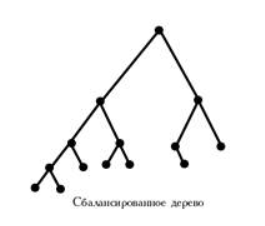

In [25]:
class Node(object):
    # узел в бинарном дереве
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

class BinaryTree(object):
    # бинарное дерево
    def __init__(self):
        self.root = None
    
    def is_balanced(root):
        # проверка, является ли сбалансированным
        if not root:
            return True

        left_height = get_height(root.left)
        right_height = get_height(root.right)

        return abs(left_height - right_height) <= 1 and \
               is_balanced(root.left) and is_balanced(root.right)

    def get_height(root): 
        if not root:
            return 0
        return max(get_height(root.left), get_height(root.right)) + 1


In [26]:
def is_balanced(root):
    # проверка на сбалансированность
    if not root:
        return True

    left_height = get_height(root.left)
    right_height = get_height(root.right)

    return abs(left_height - right_height) <= 1 and \
           is_balanced(root.left) and is_balanced(root.right)

def get_height(root):
    # часть проверки на сбалансированность, возвращает "высоту" дерева для данного корня
    if not root:
        return 0
    return max(get_height(root.left), get_height(root.right)) + 1


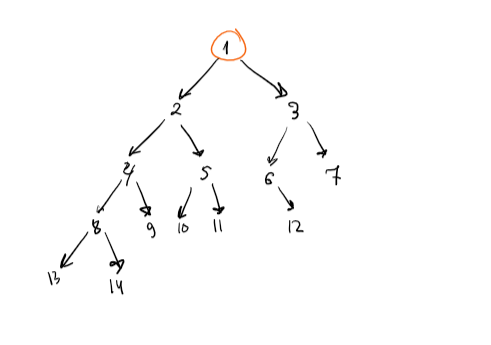

In [27]:
# Создадим сбалансированное бинарное дерево
tree = BinaryTree()
tree.root = Node(1)
tree.root.left = Node(2)
tree.root.right = Node(3)
tree.root.left.left = Node(4)
tree.root.left.right = Node(5)
tree.root.right.left = Node(6)
tree.root.right.right = Node(7)
tree.root.left.left.left = Node(8)
tree.root.left.left.right = Node(9)
tree.root.left.right.left = Node(10)
tree.root.left.right.right = Node(11)
tree.root.right.left.left = Node(12)
tree.root.left.left.left.left = Node(13)
tree.root.left.left.left.right = Node(14)


# Проверим сбалансированность дерева
print(is_balanced(tree.root))  # Выведет True


True


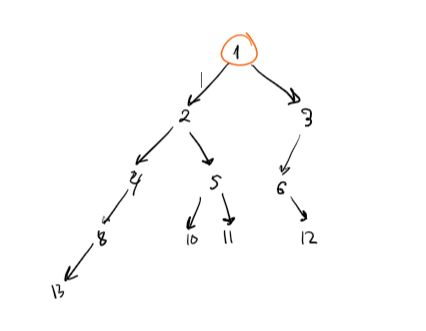

In [28]:
# Создадим несбалансированное бинарное дерево
tree2 = BinaryTree()
tree2.root = Node(1)
tree2.root.left = Node(2)
tree2.root.right = Node(3)
tree2.root.left.left = Node(4)
tree2.root.left.right = Node(5)
tree2.root.right.left = Node(6)

tree2.root.left.left.left = Node(8)

tree2.root.left.right.left = Node(10)
tree2.root.left.right.right = Node(11)
tree2.root.right.left.left = Node(12)
tree2.root.left.left.left.left = Node(13)


# Проверим сбалансированность дерева
print(is_balanced(tree2.root))  # Выведет False


False


## 40
Работает система, которая отслеживает активность пользователей на веб-сайте. Каждый раз, когда пользователь посещает страницу, система создает запись с временной меткой. Реализовать структуру данных на основе двоичной кучи, которая будет поддерживать операции добавления записи и извлечения записей за определенный период времени.


Решение:

разобрать как работает

I

I

- Кучи - это двоичные деревья, для которых каждый родительский узел имеет значение, меньшее или равное любому из его дочерних элементов. В этой реализации используются массивы, для которых heap[k] <= heap[2*k+1] и heap[k] <= heap[2*k+2] для всех k, считая элементы с нуля. Для сравнения, несуществующие элементы считаются бесконечными. Интересным свойством кучи является то, что ее наименьшим элементом всегда является корень heap[0].



- Двоичная куча – бинарное дерево, где значение в любой вершине ``не меньше`` (больше), чем значения её потомков, при этом ``заполнение уровней должно быть последовательным`` (без дырок и перескоков на следующий уровень, если текущий уровень не закончен). Работа с кучей осуществляется за время порядка O(log n).

In [33]:
from heapq import heappush, heappop  # heapq = heap queue algorithm


class TimedRecord(object):
    # класс Запись: время посещения, данные о посетителе
    def __init__(self, timestamp, data):
        self.timestamp = timestamp
        self.data = data

        
class TimedRecordHeap(object):
    def __init__(self):
        self.heap = []

    def add(self, record):
        heappush(self.heap, (record.timestamp, record))
              
    def get_records_in_period(self, start_time, end_time):
        result = []
        while self.heap and self.heap[0][0] < start_time:
            # до тех пор пока не дощли до start_time идем по куче
            heappop(self.heap)

        while self.heap and self.heap[0][0] <= end_time:
            # в заданном промежутке времени добавляем в результат данные 
            _, record = heappop(self.heap)
            result.append(record)

        return result


In [34]:
# Создадим кучу записей о времени
heap = TimedRecordHeap()

# Добавим несколько записей
heap.add(TimedRecord(1651843200, "Пользователь 1 посетил страницу A"))
heap.add(TimedRecord(1651843300, "Пользователь 2 посетил страницу B"))
heap.add(TimedRecord(1651843400, "Пользователь 3 посетил страницу C"))
heap.add(TimedRecord(1651843500, "Пользователь 1 снова посетил страницу A"))

# Получим записи за определенный период времени
records = heap.get_records_in_period(1651843250, 1651843450)

# Выведем полученные записи
for record in records:
    print(record.data)


Пользователь 2 посетил страницу B
Пользователь 3 посетил страницу C
